**Business Problem Understanding**


The goal is to leverage a dataset of student depression indicators to build models that can identify students who may be experiencing depressive symptoms. The aim is to help educational institutions, mental health professionals, and policy-makers.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Student Depression Dataset.csv")

In [7]:
df.shape

(27901, 18)

the dataset contains 27901 rows and 18 columns 

In [10]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [14]:
df["id"].nunique()

27901

the id column contains only unique values 

In [17]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

the gender column contains male and female categories

In [20]:
df["Gender"].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

In [22]:
df["Age"].nunique()

34

In [24]:
df["Age"].unique().tolist()

[33.0,
 24.0,
 31.0,
 28.0,
 25.0,
 29.0,
 30.0,
 27.0,
 19.0,
 20.0,
 23.0,
 18.0,
 21.0,
 22.0,
 34.0,
 32.0,
 26.0,
 39.0,
 35.0,
 42.0,
 36.0,
 58.0,
 49.0,
 38.0,
 51.0,
 44.0,
 43.0,
 46.0,
 59.0,
 54.0,
 48.0,
 56.0,
 37.0,
 41.0]

no wrong data is available in Age column

In [27]:
df["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

wrong data is available in City column

df["City"].value_counts()

In [31]:
df["Profession"].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

no wrong data is available in Profession column

In [34]:
df["Profession"].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [36]:
df["Academic Pressure"].unique()

array([5., 2., 3., 4., 1., 0.])

no wrong data is available and need to change the values to text labels for better understanding

In [39]:
df["Academic Pressure"].value_counts()

Academic Pressure
3.0    7462
5.0    6296
4.0    5155
1.0    4801
2.0    4178
0.0       9
Name: count, dtype: int64

In [41]:
df["Work Pressure"].unique()

array([0., 5., 2.])

no wrong data is available and need to change the values to text labels for better understanding

In [44]:
df["Work Pressure"].value_counts()

Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [46]:
df["CGPA"].unique()

array([ 8.97  ,  5.9   ,  7.03  ,  5.59  ,  8.13  ,  5.7   ,  9.54  ,
        8.04  ,  9.79  ,  8.38  ,  6.1   ,  7.04  ,  8.52  ,  5.64  ,
        8.58  ,  6.51  ,  7.25  ,  7.83  ,  9.93  ,  8.74  ,  6.73  ,
        5.57  ,  8.59  ,  7.1   ,  6.08  ,  5.74  ,  9.86  ,  6.7   ,
        6.21  ,  5.87  ,  6.37  ,  9.72  ,  5.88  ,  9.56  ,  6.99  ,
        5.24  ,  9.21  ,  7.85  ,  6.95  ,  5.86  ,  7.92  ,  9.66  ,
        8.94  ,  9.71  ,  7.87  ,  5.6   ,  7.9   ,  5.46  ,  6.79  ,
        8.7   ,  7.38  ,  8.5   ,  7.09  ,  9.82  ,  8.89  ,  7.94  ,
        9.11  ,  6.75  ,  7.53  ,  9.49  ,  9.01  ,  7.64  ,  5.27  ,
        6.    ,  9.44  ,  5.75  ,  7.51  ,  9.05  ,  6.38  ,  8.95  ,
        9.88  ,  5.32  ,  6.27  ,  7.7   ,  8.1   ,  9.59  ,  8.96  ,
        5.51  ,  7.43  ,  8.79  ,  9.95  ,  5.37  ,  6.86  ,  8.32  ,
        9.74  ,  5.66  ,  7.48  ,  8.23  ,  8.81  ,  6.03  ,  5.56  ,
        5.68  ,  5.14  ,  7.61  ,  6.17  ,  8.17  ,  9.87  ,  8.75  ,
        6.16  ,  9.5

In [48]:
df["Study Satisfaction"].unique()

array([2., 5., 3., 4., 1., 0.])

In [50]:
df["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6359
2.0    5838
3.0    5821
1.0    5451
5.0    4422
0.0      10
Name: count, dtype: int64

no wrong data is available in Study Satisfaction column

In [53]:
df["Job Satisfaction"].unique()

array([0., 3., 4., 2., 1.])

In [55]:
df["Job Satisfaction"].value_counts()

Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

no wrong data is available in Job Satisfaction column

In [58]:
df["Sleep Duration"].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [60]:
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [62]:
df["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [64]:
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [66]:
df["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [68]:
df["Degree"].value_counts()

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [70]:
df["Have you ever had suicidal thoughts ?"].unique()

array(['Yes', 'No'], dtype=object)

In [72]:
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64

no wrong data is available in Have you ever had suicidal thoughts? column

In [75]:
df["Work/Study Hours"].unique().tolist()

[3.0, 9.0, 4.0, 1.0, 0.0, 12.0, 2.0, 11.0, 10.0, 6.0, 8.0, 5.0, 7.0]

no wrong data is available in Work/Study Hours column

In [78]:
df["Financial Stress"].unique()

array([ 1.,  2.,  5.,  3.,  4., nan])

the financial stress column contains missing data

In [81]:
df["Financial Stress"].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [83]:
df["Family History of Mental Illness"].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
df["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64

no wrong data is available

In [88]:
df["Depression"].unique()

array([1, 0], dtype=int64)

In [90]:
df["Depression"].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

no wrong data is available in Depression column

In [93]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [95]:
df["Academic Pressure"]=df["Academic Pressure"].replace({0:"Low",1:"Low",2:"Moderate",3:"Moderate",4:"High",5:"High"})
df["Study Satisfaction"]=df["Study Satisfaction"].replace({0:"Dissatisfied",1:"Dissatisfied",2:"Neutral",3:"Neutral",4:"Satisfied",5:"Satisfied"})
df["Financial Stress"]=df["Financial Stress"].replace({1:"Very_Low",2:"Low",3:"Moderate",4:"High",5:"Very_High"})
df["Depression"]=df["Depression"].replace({0:"No",1:"Yes"})
df=df.rename(columns={"Work/Study Hours":"Study Hours","Have you ever had suicidal thoughts ?":"ever had suicidal thoughts"})

In [97]:
continous = ["Age","CGPA","Study Hours"]

categorical = ["Gender","City","Profession","Academic Pressure","Study Satisfaction","Sleep Duration","Dietary Habits","Degree","ever had suicidal thoughts","Financial Stress","Family History of Mental Illness","Depression"]

In [99]:
df[continous].describe()

,Age,CGPA,Study Hours
count,27901.000000,27901.000000,27901.000000
mean,25.822300,7.656104,7.156984
std,4.905687,1.470707,3.707642
min,18.000000,0.000000,0.000000
25%,21.000000,6.290000,4.000000
50%,25.000000,7.770000,8.000000
75%,30.000000,8.920000,10.000000
max,59.000000,10.000000,12.000000


In [101]:
df[categorical].describe()

,Gender,City,Profession,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,ever had suicidal thoughts,Financial Stress,Family History of Mental Illness,Depression
count,27901,27901,27901,27901,27901,27901,27901,27901,27901,27898,27901,27901
unique,2,52,14,3,3,5,4,28,2,5,2,2
top,Male,Kalyan,Student,Moderate,Neutral,Less than 5 hours,Unhealthy,Class 12,Yes,Very_High,No,Yes
freq,15547,1570,27870,11640,11659,8310,10317,6080,17656,6715,14398,16336


<Axes: xlabel='Age', ylabel='Count'>

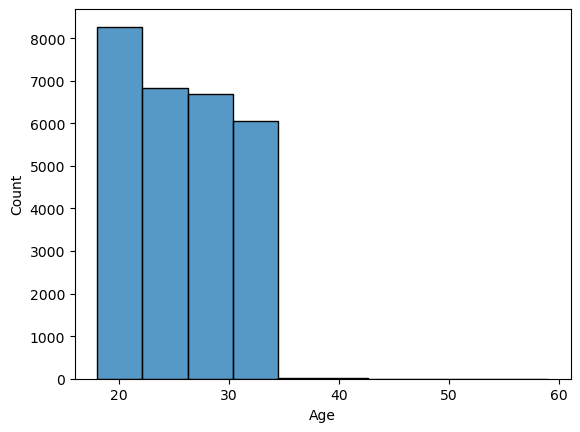

In [103]:
sns.histplot(df["Age"],bins=10)

the age column is right skewed and more number of students are from the age 20-30 and very very few are from 40-50 age group

<Axes: xlabel='CGPA', ylabel='Count'>

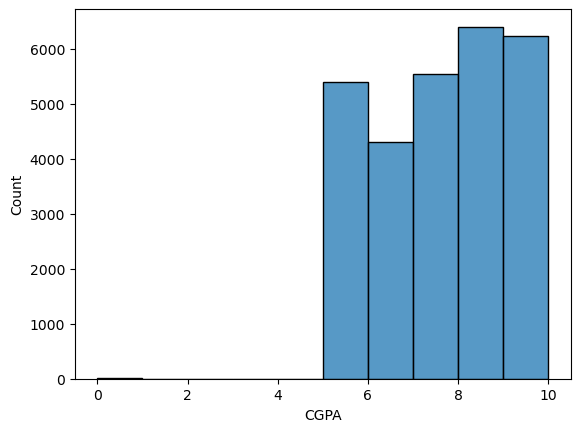

In [106]:
sns.histplot(df["CGPA"],bins=10)

the cgpa column is left skewed and more number of students scored 8-10 cgpa 

very few considerably negligible scored very low cgpa

<Axes: xlabel='Study Hours', ylabel='Count'>

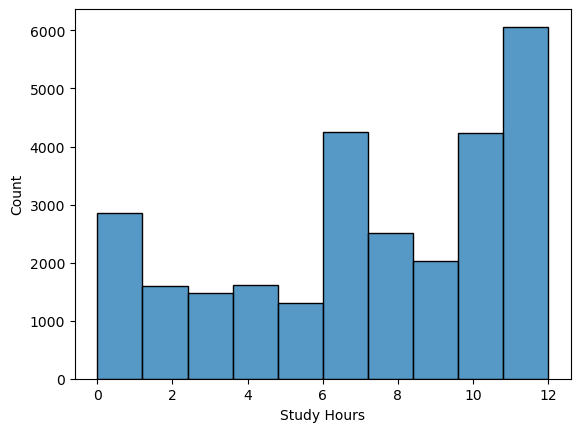

In [109]:
sns.histplot(df["Study Hours"],bins=10)

the distribution of study hours column is normal and 12 hours is the maximum study hours

<Axes: ylabel='Age'>

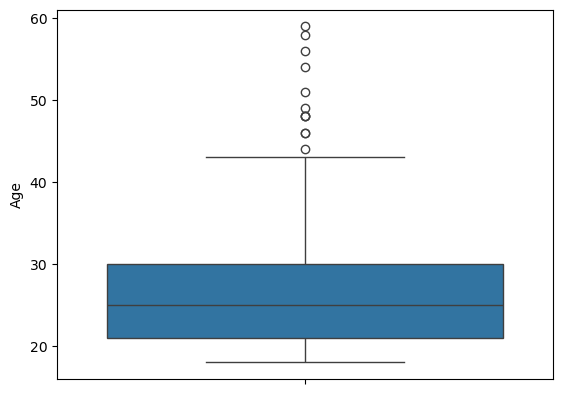

In [112]:
sns.boxplot(df["Age"])

<Axes: ylabel='CGPA'>

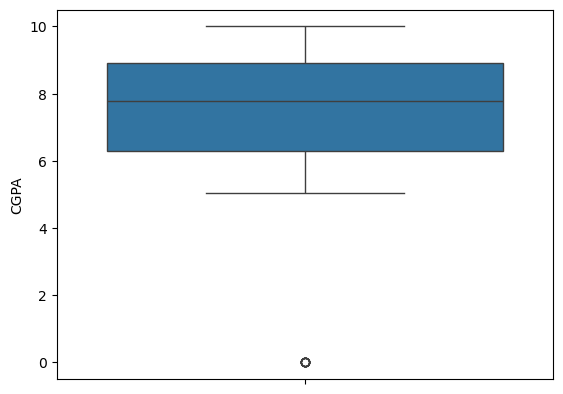

In [114]:
sns.boxplot(df["CGPA"])

<Axes: ylabel='Study Hours'>

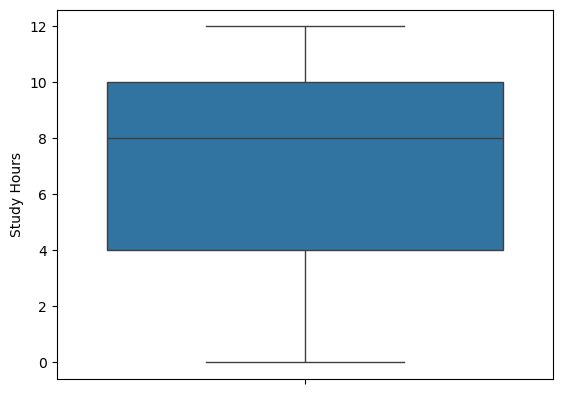

In [116]:
sns.boxplot(df["Study Hours"])

**Data Cleaning**

**Treating wrong data**

In [120]:
df["City"]=df["City"].replace({"Nalyan":"Kalyan","Khaziabad":"Ghaziabad"})

In [122]:
invalid_entries = ['Saanvi', 'Bhavna', 'City', 'Harsha', 'Kibara', 'Nandini','Nalini', 'Mihir', 'M.Com', 'ME', 'Rashi', 'Gaurav','Reyansh', 'Harsh', 'Vaanya', 'Mira', 'Less than 5 Kalyan','3.0', 'Less Delhi', 'M.Tech']

df = df[~df['City'].isin(invalid_entries)]

**Treat missing values**

In [125]:
df.isnull().sum()

id                                  0
Gender                              0
Age                                 0
City                                0
Profession                          0
Academic Pressure                   0
Work Pressure                       0
CGPA                                0
Study Satisfaction                  0
Job Satisfaction                    0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
ever had suicidal thoughts          0
Study Hours                         0
Financial Stress                    3
Family History of Mental Illness    0
Depression                          0
dtype: int64

the financial stress column contains 3 missing values and the percentage of missing values is very low so drop the rows which have missing values

In [128]:
df.dropna(inplace=True,ignore_index=True)

**Drop unimportant columns**

In [131]:
df=df.drop(columns=["id","Work Pressure","Job Satisfaction"])

the id column contains only unique values which is not useful for analysis

the work pressure and job satisfaction columns are dominated by a single category and Other categories have insignificant counts, not enough for reliable analysis

so i dropped these columns

In [134]:
df.duplicated().sum()

0

no duplicates are available 

In [137]:
df.dtypes

Gender                               object
Age                                 float64
City                                 object
Profession                           object
Academic Pressure                    object
CGPA                                float64
Study Satisfaction                   object
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
ever had suicidal thoughts           object
Study Hours                         float64
Financial Stress                     object
Family History of Mental Illness     object
Depression                           object
dtype: object

no wrong datatypes

**Treat outliers**

In [141]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
IQR=q3-q1
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)

In [143]:
outliers=df[(df["Age"]<lower_limit) | (df["Age"]>upper_limit)]
outliers

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,ever had suicidal thoughts,Study Hours,Financial Stress,Family History of Mental Illness,Depression
2909,Female,58.0,Chennai,Student,High,8.58,Dissatisfied,7-8 hours,Healthy,Class 12,No,4.0,High,No,No
3436,Male,49.0,Nagpur,Student,Moderate,6.47,Neutral,5-6 hours,Moderate,Class 12,Yes,2.0,Very_Low,Yes,No
4386,Female,51.0,Bhopal,Student,Moderate,8.26,Neutral,Less than 5 hours,Moderate,MBBS,Yes,5.0,Very_High,Yes,No
5535,Female,44.0,Srinagar,Student,Low,6.83,Neutral,Less than 5 hours,Unhealthy,BSc,No,4.0,Moderate,No,No
8996,Male,46.0,Nashik,Student,Low,6.10,Neutral,7-8 hours,Unhealthy,PhD,No,4.0,Low,No,No
9228,Male,59.0,Nashik,Student,Low,8.14,Dissatisfied,5-6 hours,Unhealthy,PhD,Yes,10.0,High,Yes,No
13487,Male,54.0,Agra,Student,High,9.60,Neutral,More than 8 hours,Unhealthy,B.Ed,Yes,9.0,Moderate,Yes,No
13604,Female,48.0,Ghaziabad,Student,Moderate,7.48,Satisfied,More than 8 hours,Healthy,LLB,No,2.0,High,No,No
14802,Female,56.0,Ludhiana,Student,Moderate,7.94,Satisfied,5-6 hours,Unhealthy,BSc,No,1.0,Very_High,Yes,No
18747,Female,46.0,Lucknow,Student,Moderate,6.83,Dissatisfied,5-6 hours,Healthy,MCA,No,8.0,Very_High,No,Yes


In [145]:
df.drop(index=[2909,3436,4386,5535,8996,9228,13487,13604,14802,18747,25176,27307],inplace=True)

In [147]:
q1=df["CGPA"].quantile(0.25)
q3=df["CGPA"].quantile(0.75)
IQR=q3-q1
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)

In [149]:
outliers_cgpa=df[(df["CGPA"]<lower_limit) | (df["CGPA"]>upper_limit)]
outliers_cgpa

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,ever had suicidal thoughts,Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,Male,38.0,Chennai,Student,Low,0.0,Dissatisfied,5-6 hours,Healthy,Class 12,No,2.0,Moderate,No,No
10397,Male,28.0,Vadodara,Student,Moderate,0.0,Satisfied,Less than 5 hours,Healthy,BBA,No,12.0,Low,No,No
11479,Female,32.0,Vadodara,Student,High,0.0,Dissatisfied,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,Very_High,No,Yes
13894,Female,20.0,Ahmedabad,Student,Low,0.0,Dissatisfied,Less than 5 hours,Moderate,Class 12,Yes,12.0,Moderate,Yes,Yes
14838,Male,21.0,Lucknow,Student,Low,0.0,Dissatisfied,7-8 hours,Moderate,Class 12,Yes,3.0,Moderate,Yes,No
20893,Male,18.0,Ahmedabad,Student,Low,0.0,Dissatisfied,Less than 5 hours,Moderate,Class 12,Yes,9.0,Very_High,No,Yes
21784,Male,34.0,Pune,Student,Low,0.0,Satisfied,Less than 5 hours,Unhealthy,M.Ed,Yes,10.0,Moderate,Yes,No
25720,Male,18.0,Rajkot,Student,Low,0.0,Dissatisfied,7-8 hours,Moderate,Class 12,Yes,9.0,High,No,Yes
26692,Female,24.0,Meerut,Student,Low,0.0,Dissatisfied,More than 8 hours,Unhealthy,Class 12,No,0.0,Very_High,No,No


In [151]:
df.drop(index=[4365,10397,11479,13894,14838,20893,21784,25720,26692],inplace=True)

CGPA = 0.0 — which is not a valid CGPA (in any grading system). so i removed the outliers

In [154]:
df.reset_index(drop=True)

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,ever had suicidal thoughts,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,High,8.97,Neutral,5-6 hours,Healthy,B.Pharm,Yes,3.0,Very_Low,No,Yes
1,Female,24.0,Bangalore,Student,Moderate,5.90,Satisfied,5-6 hours,Moderate,BSc,No,3.0,Low,Yes,No
2,Male,31.0,Srinagar,Student,Moderate,7.03,Satisfied,Less than 5 hours,Healthy,BA,No,9.0,Very_Low,Yes,No
3,Female,28.0,Varanasi,Student,Moderate,5.59,Neutral,7-8 hours,Moderate,BCA,Yes,4.0,Very_High,Yes,Yes
4,Female,25.0,Jaipur,Student,High,8.13,Neutral,5-6 hours,Moderate,M.Tech,Yes,1.0,Very_Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27848,Female,27.0,Surat,Student,High,5.75,Satisfied,5-6 hours,Unhealthy,Class 12,Yes,7.0,Very_Low,Yes,No
27849,Male,27.0,Ludhiana,Student,Moderate,9.40,Neutral,Less than 5 hours,Healthy,MSc,No,0.0,Moderate,Yes,No
27850,Male,31.0,Faridabad,Student,Moderate,6.61,Satisfied,5-6 hours,Unhealthy,MD,No,12.0,Low,No,No
27851,Female,18.0,Ludhiana,Student,High,6.88,Neutral,Less than 5 hours,Healthy,Class 12,Yes,10.0,Very_High,No,Yes


**Data Analysis**

In [157]:
df["Gender"].value_counts()

Gender
Male      15522
Female    12331
Name: count, dtype: int64

male students are high in the given dataset

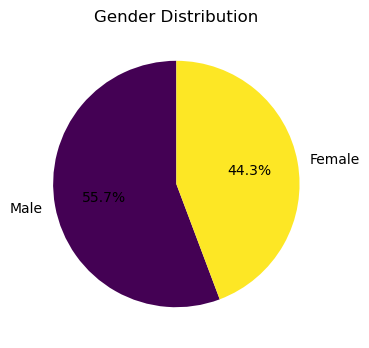

In [160]:
category_counts = df['Gender'].value_counts()
plt.figure(figsize=(4,4))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Gender Distribution')
plt.ylabel('')  
plt.show()

In [162]:
df["City"].value_counts()

City
Kalyan           1571
Srinagar         1371
Hyderabad        1339
Vasai-Virar      1290
Lucknow          1153
Thane            1139
Ludhiana         1110
Agra             1093
Surat            1077
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              967
Ahmedabad         949
Bhopal            933
Chennai           883
Meerut            824
Rajkot            814
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          692
Varanasi          684
Nagpur            650
Indore            643
Kanpur            609
Nashik            545
Faridabad         461
Name: count, dtype: int64

Students from Kalyan city are high and Students from Faridabad city are low

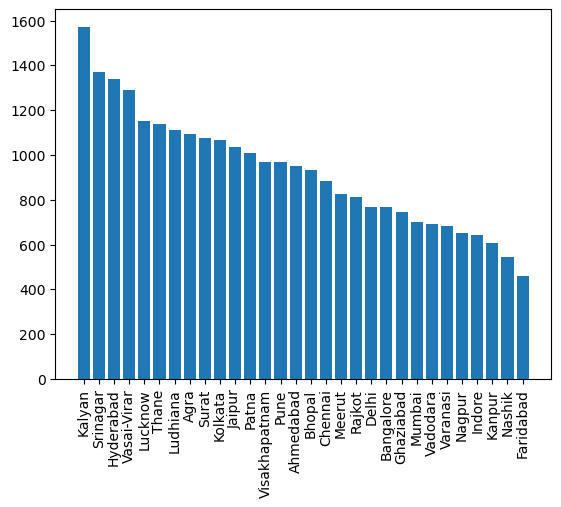

In [165]:
plt.bar(df["City"].value_counts().index,df["City"].value_counts())
plt.xticks(rotation="vertical")
plt.show()

In [167]:
df["Profession"].value_counts()

Profession
Student                   27822
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

student category is high in profession column while the other categories are less than 10 so grouping all to one category as working students for better analysis

In [170]:
vc = df["Profession"].value_counts()
df["Profession"] = df["Profession"].apply(lambda x: x if vc[x] >= 10 else 'Working student')

In [172]:
df["Profession"].value_counts()

Profession
Student            27822
Working student       31
Name: count, dtype: int64

In [174]:
df["Academic Pressure"].value_counts()

Academic Pressure
Moderate    11617
High        11442
Low          4794
Name: count, dtype: int64

students with moderate academic pressure are high followed by high academic pressure

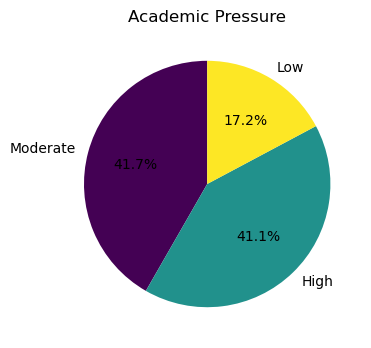

In [177]:
category_counts = df['Academic Pressure'].value_counts()
plt.figure(figsize=(4,4))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Academic Pressure')
plt.ylabel('')  
plt.show()

In [179]:
df["Study Satisfaction"].value_counts()

Study Satisfaction
Neutral         11644
Satisfied       10769
Dissatisfied     5440
Name: count, dtype: int64

students with moderate study satisfaction are high in number followed by satisfied students

dissatisfied students in study are low in number

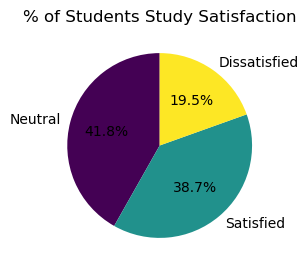

In [182]:
category_counts = df['Study Satisfaction'].value_counts()
plt.figure(figsize=(3, 3))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('% of Students Study Satisfaction')
plt.ylabel('')  
plt.show()

In [184]:
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8297
7-8 hours            7330
5-6 hours            6170
More than 8 hours    6038
Others                 18
Name: count, dtype: int64

students whose sleep duration is 'less than 5 hours' are 'high' in number

'others' i.e., may be irregular sleep schedule students are 'low' in number

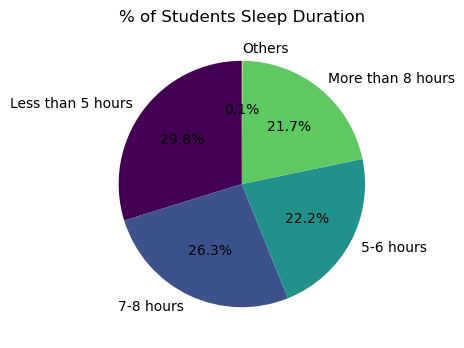

In [187]:
category_counts = df['Sleep Duration'].value_counts()
plt.figure(figsize=(4,4))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('% of Students Sleep Duration')
plt.ylabel('')  
plt.show()

In [189]:
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10295
Moderate      9909
Healthy       7637
Others          12
Name: count, dtype: int64

'unhealthy' dietary habit students are more in number

'others' i.e., no specific dietary habit students are 'low' in number followed by 'healthy' dietary habit students are 'low' in number.

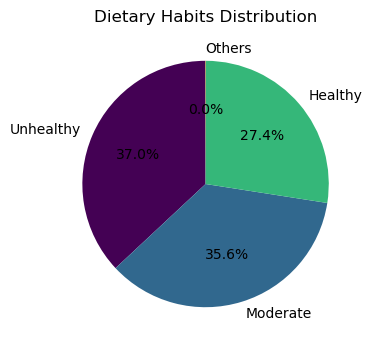

In [192]:
plt.figure(figsize=(4,4))
category_counts = df['Dietary Habits'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Dietary Habits Distribution')
plt.ylabel('')  
plt.show()


In [194]:
df["Degree"].value_counts()

Degree
Class 12    6065
B.Ed        1862
B.Com       1505
B.Arch      1478
BCA         1430
MSc         1188
B.Tech      1152
MCA         1043
M.Tech      1021
BHM          924
BSc          886
M.Ed         818
B.Pharm      810
M.Com        734
BBA          695
MBBS         694
LLB          669
BE           611
BA           599
M.Pharm      582
MD           570
MBA          561
MA           544
PhD          520
LLM          481
MHM          191
ME           185
Others        35
Name: count, dtype: int64

'class 12' students are high in number while 'others' are low in number

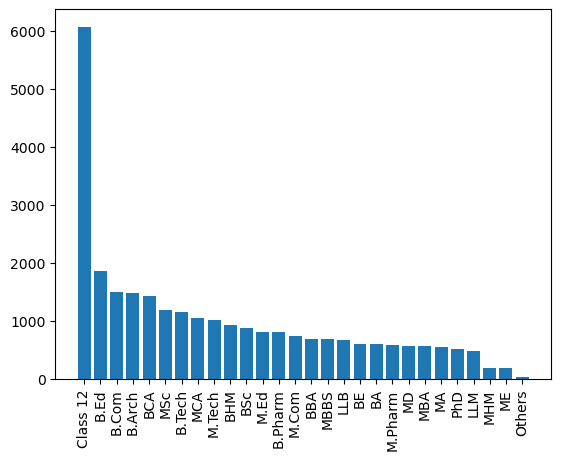

In [197]:
plt.bar(df["Degree"].value_counts().index,df["Degree"].value_counts())
plt.xticks(rotation="vertical")
plt.show()

In [199]:
df["ever had suicidal thoughts"].value_counts()

ever had suicidal thoughts
Yes    17631
No     10222
Name: count, dtype: int64

students with suicidal thoughts are high in number 

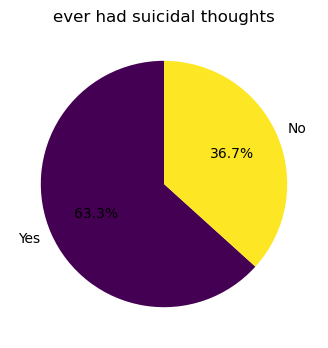

In [202]:
plt.figure(figsize=(4,4))
category_counts = df['ever had suicidal thoughts'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('ever had suicidal thoughts')
plt.ylabel('')  
plt.show()


In [204]:
df["Financial Stress"].value_counts()

Financial Stress
Very_High    6702
High         5768
Moderate     5217
Very_Low     5113
Low          5053
Name: count, dtype: int64

Students with 'Very_high' financial stress are high in number

Students with 'low' financial stresss are low in number

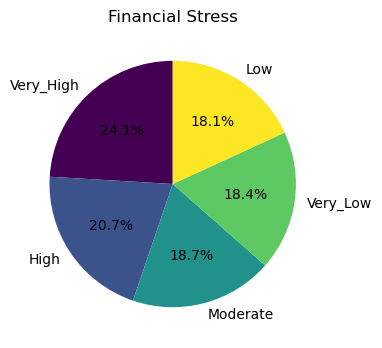

In [207]:
plt.figure(figsize=(4,4))
category_counts = df['Financial Stress'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Financial Stress')
plt.ylabel('')  
plt.show()


In [209]:
df["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
No     14371
Yes    13482
Name: count, dtype: int64

students with 'no' family history of mental illness are high in number

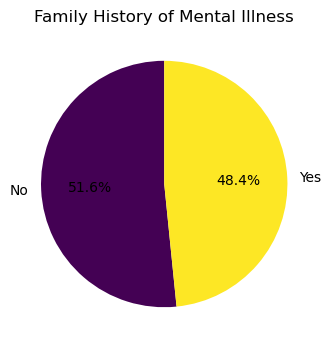

In [212]:
plt.figure(figsize=(4,4))
category_counts = df['Family History of Mental Illness'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Family History of Mental Illness')
plt.ylabel('')  
plt.show()


In [214]:
df["Depression"].value_counts()

Depression
Yes    16315
No     11538
Name: count, dtype: int64

students with Depression are high in number

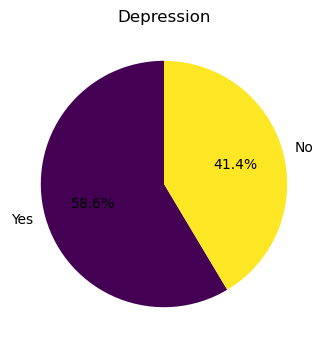

In [217]:
plt.figure(figsize=(4,4))
category_counts = df['Depression'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Depression')
plt.ylabel('')  
plt.show()


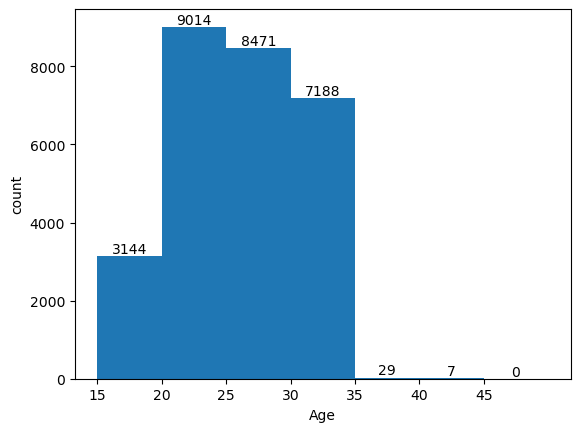

In [219]:
n,bins,patches=plt.hist(df["Age"],bins=7,range=(15,50))
plt.bar_label(patches)
plt.xlabel("Age")
plt.ylabel("count")
plt.xticks(list(range(15,50,5)))
plt.show()

students whose age is between 20-25 are high in number and students whose age between 35-45 are very low

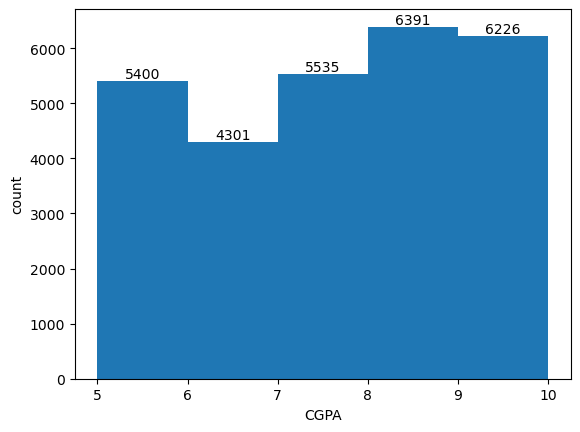

In [222]:
n,bins,patches=plt.hist(df["CGPA"],bins=5,range=(5,10))
plt.bar_label(patches)
plt.xlabel("CGPA")
plt.ylabel("count")
plt.xticks(bins)
plt.show()

students who acquired cgpa between 8-9 are high in number while students who have acquired cgpa between 6-7 are low in number

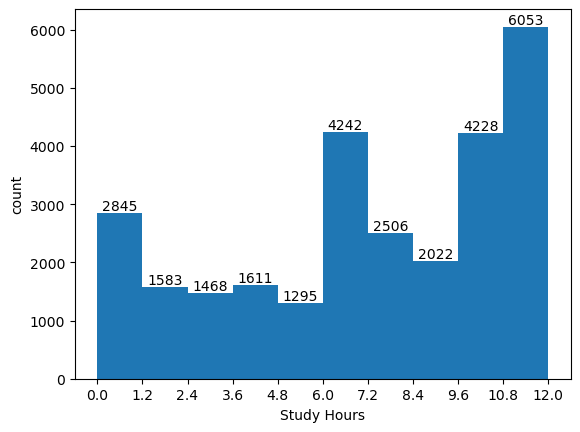

In [225]:
n,bins,patches=plt.hist(df["Study Hours"],bins=10,range=(0,12))
plt.bar_label(patches)
plt.xlabel("Study Hours")
plt.ylabel("count")
plt.xticks(bins)
plt.show()

Students who studied more than 11 hours are high in number 

students who studied between 4.5-6.0 hours are low in number
.

In [228]:
df

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,ever had suicidal thoughts,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,High,8.97,Neutral,5-6 hours,Healthy,B.Pharm,Yes,3.0,Very_Low,No,Yes
1,Female,24.0,Bangalore,Student,Moderate,5.90,Satisfied,5-6 hours,Moderate,BSc,No,3.0,Low,Yes,No
2,Male,31.0,Srinagar,Student,Moderate,7.03,Satisfied,Less than 5 hours,Healthy,BA,No,9.0,Very_Low,Yes,No
3,Female,28.0,Varanasi,Student,Moderate,5.59,Neutral,7-8 hours,Moderate,BCA,Yes,4.0,Very_High,Yes,Yes
4,Female,25.0,Jaipur,Student,High,8.13,Neutral,5-6 hours,Moderate,M.Tech,Yes,1.0,Very_Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,Female,27.0,Surat,Student,High,5.75,Satisfied,5-6 hours,Unhealthy,Class 12,Yes,7.0,Very_Low,Yes,No
27870,Male,27.0,Ludhiana,Student,Moderate,9.40,Neutral,Less than 5 hours,Healthy,MSc,No,0.0,Moderate,Yes,No
27871,Male,31.0,Faridabad,Student,Moderate,6.61,Satisfied,5-6 hours,Unhealthy,MD,No,12.0,Low,No,No
27872,Female,18.0,Ludhiana,Student,High,6.88,Neutral,Less than 5 hours,Healthy,Class 12,Yes,10.0,Very_High,No,Yes


In [230]:
pd.crosstab(df["Gender"],df["Depression"],margins=True,normalize="index")

Depression,No,Yes
Gender,,
Female,0.415295,0.584705
Male,0.413413,0.586587
All,0.414246,0.585754


In [232]:
pd.crosstab(df["City"],df["Depression"],margins=True)

Depression,No,Yes,All
City,,,
Agra,508,585,1093
Ahmedabad,311,638,949
Bangalore,300,467,767
Bhopal,354,579,933
Chennai,355,528,883
Delhi,300,468,768
Faridabad,190,271,461
Ghaziabad,316,429,745
Hyderabad,442,897,1339


h0 : City and Depression are independent

h1 : City and Depression are not independent

In [237]:
a=pd.crosstab(df["City"],df["Depression"])
from scipy import stats
chisquare=stats.chi2_contingency(a)
chisquare

Chi2ContingencyResult(statistic=164.85046699523892, pvalue=6.0675153876308194e-21, dof=29, expected_freq=array([[452.77111981, 640.22888019],
       [393.11966395, 555.88033605],
       [317.72685169, 449.27314831],
       [386.49172441, 546.50827559],
       [365.77941335, 517.22058665],
       [318.14109791, 449.85890209],
       [190.96750799, 270.03249201],
       [308.61343482, 436.38656518],
       [554.67569023, 784.32430977],
       [266.36032025, 376.63967975],
       [429.1590852 , 606.8409148 ],
       [650.78081356, 920.21918644],
       [252.27594873, 356.72405127],
       [441.17222561, 623.82777439],
       [477.62589308, 675.37410692],
       [459.81330557, 650.18669443],
       [341.3388863 , 482.6611137 ],
       [289.55810864, 409.44189136],
       [269.2600438 , 380.7399562 ],
       [225.76419057, 319.23580943],
       [417.14594478, 589.85405522],
       [400.57609593, 566.42390407],
       [337.19642408, 476.80357592],
       [567.93156931, 803.06843069],
       

p value < alpha . 
so reject h0 

by above test the City and Depression column are related to eachother

In [241]:
pd.crosstab(df["Profession"],df["Depression"],margins=True)

Depression,No,Yes,All
Profession,,,
Student,11535,16287,27822
Working student,3,28,31
All,11538,16315,27853


all working students are depressed and working students are comparitively more depressed than students

In [244]:
pd.crosstab(df["Academic Pressure"],df["Depression"],margins=True,normalize="index")

Depression,No,Yes
Academic Pressure,,
High,0.183884,0.816116
Low,0.805590,0.194410
Moderate,0.479642,0.520358
All,0.414246,0.585754


Students with 'high' Academic Pressure are highly depressed .By above analysis academic pressure and Depression are correlated

In [247]:
pd.crosstab(df["Study Satisfaction"],df["Depression"],margins=True,normalize="index")

Depression,No,Yes
Study Satisfaction,,
Dissatisfied,0.292279,0.707721
Neutral,0.388698,0.611302
Satisfied,0.503482,0.496518
All,0.414246,0.585754


students who has 'dissatisfaction' in their studies are having  high Depression and students who are 'satisfied' in their studies are less depressed

In [250]:
pd.crosstab(df["Sleep Duration"],df["Depression"],normalize="index")

Depression,No,Yes
Sleep Duration,,
5-6 hours,0.430956,0.569044
7-8 hours,0.404502,0.595498
Less than 5 hours,0.354707,0.645293
More than 8 hours,0.490560,0.509440
Others,0.500000,0.500000


students who has sleep duration 'less than 5 hours' has high rate of depression

In [253]:
pd.crosstab(df["Dietary Habits"],df["Depression"],normalize="index",margins=True)

Depression,No,Yes
Dietary Habits,,
Healthy,0.545895,0.454105
Moderate,0.439701,0.560299
Others,0.333333,0.666667
Unhealthy,0.292181,0.707819
All,0.414246,0.585754


students with 'unhealthy dietary habits' have high rate of depression and 'others' i.e., no specific dietary habit students also have high rate of depression.

'Healthy' dietary habit students are less depressed.

h0 : Degree and Depression are independent

h1 : Degree and Depression are not independent

In [259]:
g=pd.crosstab(df["Degree"],df["Depression"],margins=True)
chisquare=stats.chi2_contingency(g)
chisquare

Chi2ContingencyResult(statistic=530.2018360682644, pvalue=2.0403275553701076e-78, dof=56, expected_freq=array([[6.12255915e+02, 8.65744085e+02, 1.47800000e+03],
       [6.23440563e+02, 8.81559437e+02, 1.50500000e+03],
       [7.71326464e+02, 1.09067354e+03, 1.86200000e+03],
       [3.35539439e+02, 4.74460561e+02, 8.10000000e+02],
       [4.77211647e+02, 6.74788353e+02, 1.15200000e+03],
       [2.48133487e+02, 3.50866513e+02, 5.99000000e+02],
       [2.87901124e+02, 4.07098876e+02, 6.95000000e+02],
       [5.92372096e+02, 8.37627904e+02, 1.43000000e+03],
       [2.53104441e+02, 3.57895559e+02, 6.11000000e+02],
       [3.82763508e+02, 5.41236492e+02, 9.24000000e+02],
       [3.67022152e+02, 5.18977848e+02, 8.86000000e+02],
       [2.51240333e+03, 3.55259667e+03, 6.06500000e+03],
       [2.77130722e+02, 3.91869278e+02, 6.69000000e+02],
       [1.99252432e+02, 2.81747568e+02, 4.81000000e+02],
       [3.04056726e+02, 4.29943274e+02, 7.34000000e+02],
       [3.38853409e+02, 4.79146591e+02, 8

p value < alpha . 
so reject h0 

there is significant relation between Degree and Depression

In [262]:
pd.crosstab(df["ever had suicidal thoughts"],df["Depression"],margins=True,normalize="index")

Depression,No,Yes
ever had suicidal thoughts,,
No,0.767854,0.232146
Yes,0.209234,0.790766
All,0.414246,0.585754


students who reports symptoms of depression mostly had suicidal thoughts.

h0 : ever had suicidal thoughts and Depression are independent

h1 : ever had suicidal thoughts and Depression are not independent

In [268]:
k=pd.crosstab(df["ever had suicidal thoughts"],df["Depression"])
chisquare=stats.chi2_contingency(k)
chisquare

Chi2ContingencyResult(statistic=8319.167237509675, pvalue=0.0, dof=1, expected_freq=array([[ 4234.42487344,  5987.57512656],
       [ 7303.57512656, 10327.42487344]]))

p value < alpha . 
so reject h0 

there is significant relation between ever had suicidal thoughts and Depression

In [271]:
pd.crosstab(df["Financial Stress"],df["Depression"],margins=True,normalize="index")

Depression,No,Yes
Financial Stress,,
High,0.308773,0.691227
Low,0.569958,0.430042
Moderate,0.410197,0.589803
Very_High,0.187108,0.812892
Very_Low,0.681205,0.318795
All,0.414246,0.585754


Financial stress and depression are correlated

students with 'very_High' financial stress report symptoms of depression and students with 'very_low' financial stress had low cases of depression.

-----

In [275]:
pd.crosstab(df["Family History of Mental Illness"],df["Depression"],margins=True,normalize="index")

Depression,No,Yes
Family History of Mental Illness,,
No,0.439844,0.560156
Yes,0.386960,0.613040
All,0.414246,0.585754


h0 : Family History of Mental Illness and Depression are independent

h1 : Family History of Mental Illness and Depression are not independent

In [278]:
u=pd.crosstab(df["Family History of Mental Illness"],df["Depression"])
chisquare=stats.chi2_contingency(u)
chisquare

Chi2ContingencyResult(statistic=79.9573896618179, pvalue=3.8257167838727406e-19, dof=1, expected_freq=array([[5953.13244534, 8417.86755466],
       [5584.86755466, 7897.13244534]]))

p value < alpha . 
so reject h0 

there is significant relation between Family History of Mental Illness and Depression

In [281]:
df.groupby("Depression")["Age"].mean()

Depression
No     27.121685
Yes    24.884830
Name: Age, dtype: float64

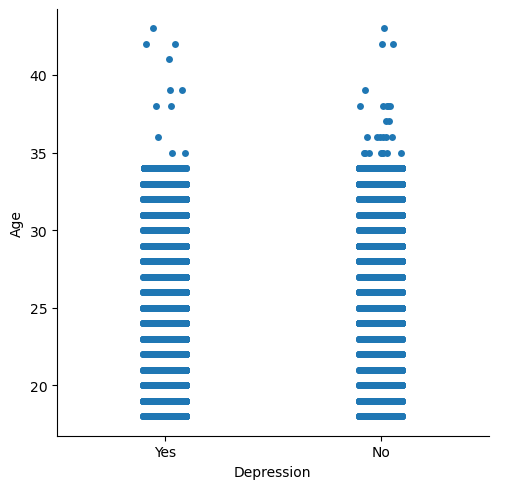

In [283]:
sns.catplot(x="Depression",y="Age",data=df)

In [285]:
df.groupby("Depression")["CGPA"].mean()

Depression
No     7.620824
Yes    7.685133
Name: CGPA, dtype: float64

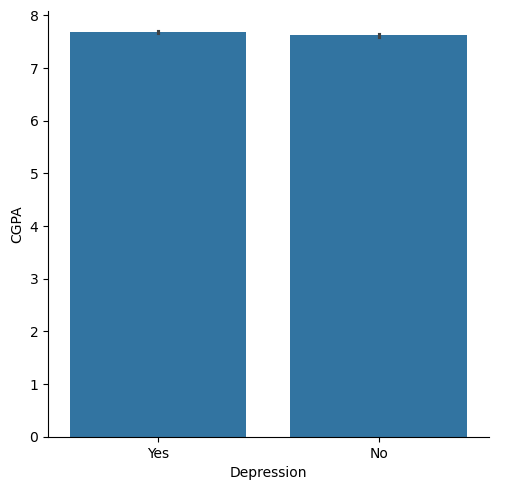

In [287]:
sns.catplot(x="Depression",y="CGPA",data=df,kind="bar")

In [289]:
df.groupby("Depression")["Study Hours"].mean()

Depression
No     6.238343
Yes    7.807723
Name: Study Hours, dtype: float64

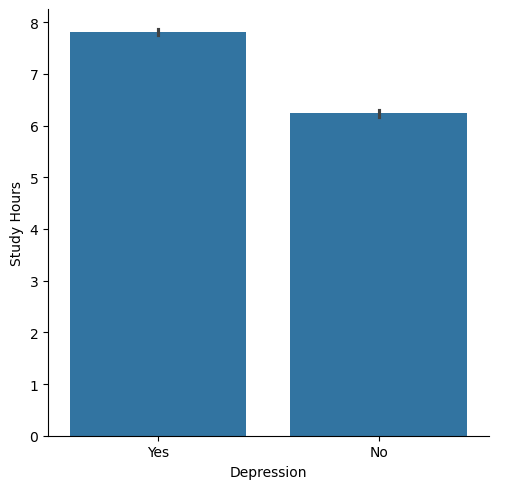

In [291]:
sns.catplot(x="Depression",y="Study Hours",data=df,kind="bar")

Students who report symptoms of depression tend to have higher study hours 

In [293]:
df[["Age","CGPA","Study Hours"]].corr()

,Age,CGPA,Study Hours
Age,1.000000,0.005056,-0.031862
CGPA,0.005056,1.000000,0.002548
Study Hours,-0.031862,0.002548,1.000000


In [295]:
df.groupby(["Sleep Duration","Depression"])["Study Hours"].mean()

Sleep Duration     Depression
5-6 hours          No            6.377962
                   Yes           7.971233
7-8 hours          No            6.302867
                   Yes           7.920504
Less than 5 hours  No            6.234115
                   Yes           7.722451
More than 8 hours  No            6.052667
                   Yes           7.610858
Others             No            6.222222
                   Yes           7.333333
Name: Study Hours, dtype: float64

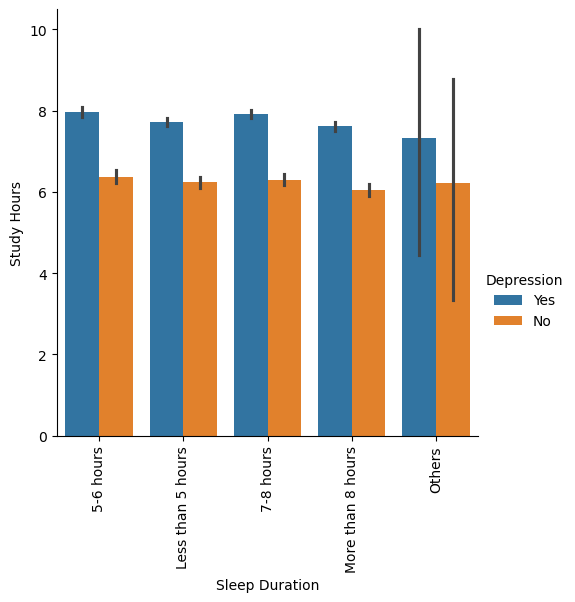

In [297]:
sns.catplot(x="Sleep Duration",y="Study Hours",data=df,hue="Depression",kind="bar")
plt.xticks(rotation="vertical")
plt.show()

In [299]:
n=pd.crosstab([df["Sleep Duration"],df["Dietary Habits"]],df["Depression"])

h0 : Sleep Duration,Dietary Habits and Depression are independent

h1 : Sleep Duration,Dietary Habits and Depression are not independent

In [302]:
chisquare=stats.chi2_contingency(n)
chisquare

Chi2ContingencyResult(statistic=1492.2613235945898, pvalue=2.194040603145242e-306, dof=18, expected_freq=array([[7.36529781e+02, 1.04147022e+03],
       [9.17555380e+02, 1.29744462e+03],
       [1.24273866e+00, 1.75726134e+00],
       [9.00571285e+02, 1.27342872e+03],
       [8.30563674e+02, 1.17443633e+03],
       [1.03934377e+03, 1.46965623e+03],
       [1.24273866e+00, 1.75726134e+00],
       [1.16527462e+03, 1.64772538e+03],
       [9.08441963e+02, 1.28455804e+03],
       [1.25765153e+03, 1.77834847e+03],
       [2.07123111e+00, 2.92876889e+00],
       [1.26883618e+03, 1.79416382e+03],
       [6.86820235e+02, 9.71179765e+02],
       [8.87315406e+02, 1.25468459e+03],
       [4.14246221e-01, 5.85753779e-01],
       [9.26668797e+02, 1.31033120e+03],
       [1.24273866e+00, 1.75726134e+00],
       [2.89972355e+00, 4.10027645e+00],
       [3.31396977e+00, 4.68603023e+00]]))

p value < alpha . 
so reject h0 

it is clear by above test that sleep duration and dietary habits of students have impact on depression

In [305]:
df.groupby(["Study Satisfaction","Depression"])["CGPA"].describe()

count      mean       std   min   25%   50%  \
Study Satisfaction Depression                                                 
Dissatisfied       No          1590.0  7.712667  1.470635  5.06  6.42  7.77   
                   Yes         3850.0  7.755265  1.444709  5.03  6.41  7.94   
Neutral            No          4526.0  7.645444  1.483784  5.03  6.26  7.70   
                   Yes         7118.0  7.696854  1.464435  5.03  6.37  7.85   
Satisfied          No          5422.0  7.573340  1.488410  5.03  6.16  7.53   
                   Yes         5347.0  7.619032  1.431364  5.03  6.29  7.77   

                                  75%   max  
Study Satisfaction Depression                
Dissatisfied       No          9.0175  10.0  
                   Yes         8.9500  10.0  
Neutral            No          8.9500  10.0  
                   Yes         8.9500  10.0  
Satisfied          No          8.9100  10.0  
                   Yes         8.8100  10.0

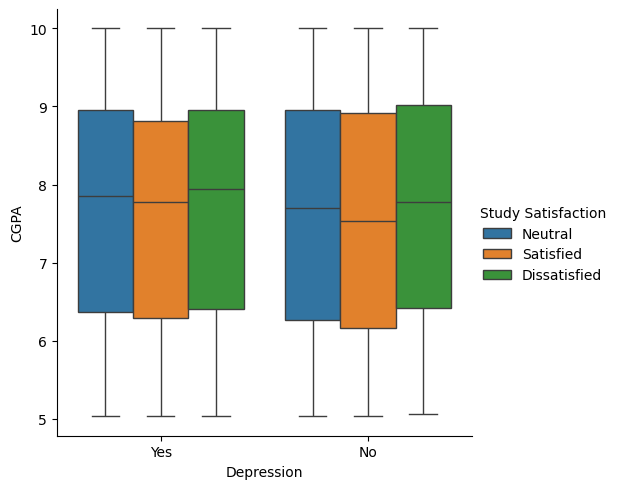

In [307]:
sns.catplot(x="Depression",y="CGPA",hue="Study Satisfaction",data=df,kind="box")

 Students who have high average cgpa and are dissatisfied in their studies are recorded as Depressed

In [310]:
df.groupby(["Academic Pressure","Depression"])["CGPA"].describe()

count      mean       std   min     25%   50%  \
Academic Pressure Depression                                                   
High              No          2104.0  7.512847  1.481684  5.03  6.0300  7.52   
                  Yes         9338.0  7.646872  1.454675  5.03  6.2700  7.83   
Low               No          3862.0  7.698348  1.480750  5.06  6.3725  7.71   
                  Yes          932.0  7.838071  1.386318  5.08  6.7750  7.91   
Moderate          No          5572.0  7.607864  1.486222  5.03  6.1900  7.68   
                  Yes         6045.0  7.720657  1.449711  5.03  6.3900  7.88   

                                 75%   max  
Academic Pressure Depression                
High              No          8.7725  10.0  
                  Yes         8.9000  10.0  
Low               No          9.0500  10.0  
                  Yes         9.0400  10.0  
Moderate          No          8.9100  10.0  
                  Yes         8.9500  10.0

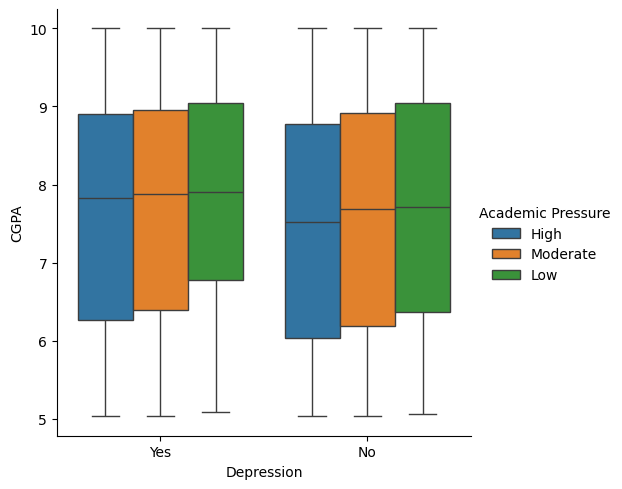

In [312]:
sns.catplot(x="Depression",y="CGPA",hue="Academic Pressure",data=df,kind="box")

h0 : Profession,Financial Stress and Depression are independent

h1 : Profession,Financial Stress and Depression are not independent

In [346]:
i=pd.crosstab([df["Profession"],df["Financial Stress"]],df["Depression"])
chisquare=stats.chi2_contingency(i)
chisquare

Chi2ContingencyResult(statistic=3709.118490622032, pvalue=0.0, dof=9, expected_freq=array([[2.38730097e+03, 3.37569903e+03],
       [2.09194342e+03, 2.95805658e+03],
       [2.15822281e+03, 3.05177719e+03],
       [2.77172147e+03, 3.91927853e+03],
       [2.11596970e+03, 2.99203030e+03],
       [2.07123111e+00, 2.92876889e+00],
       [1.24273866e+00, 1.75726134e+00],
       [2.89972355e+00, 4.10027645e+00],
       [4.55670843e+00, 6.44329157e+00],
       [2.07123111e+00, 2.92876889e+00]]))

p value < alpha . 
so reject h0 

h0 : Sleep Duration,ever had suicidal thoughts and Depression are independent

h1 : Sleep Duration,ever had suicidal thoughts and Depression are not independent

In [359]:
j=pd.crosstab([df["Sleep Duration"],df["ever had suicidal thoughts"]],df["Depression"])
chisquare=stats.chi2_contingency(j)
chisquare

Chi2ContingencyResult(statistic=8434.126263840624, pvalue=0.0, dof=9, expected_freq=array([[9.69336158e+02, 1.37066384e+03],
       [1.58656303e+03, 2.24343697e+03],
       [1.06254156e+03, 1.50245844e+03],
       [1.97388324e+03, 2.79111676e+03],
       [1.14456231e+03, 1.61843769e+03],
       [2.29243859e+03, 3.24156141e+03],
       [1.05508513e+03, 1.49191487e+03],
       [1.44613356e+03, 2.04486644e+03],
       [2.89972355e+00, 4.10027645e+00],
       [4.55670843e+00, 6.44329157e+00]]))

p value < alpha . 
so reject h0 

h0 : City,Degree and Depression are independent

h1 : City,Degree and Depression are not independent

In [363]:
n=pd.crosstab([df["City"],df["Degree"]],df["Depression"])
chisquare=stats.chi2_contingency(n)
chisquare

Chi2ContingencyResult(statistic=1450.4521259905894, pvalue=8.400647480745374e-37, dof=827, expected_freq=array([[27.75449682, 39.24550318],
       [23.61203461, 33.38796539],
       [32.72545148, 46.27454852],
       ...,
       [21.5408035 , 30.4591965 ],
       [ 0.41424622,  0.58575378],
       [ 4.97095465,  7.02904535]]))

p value < alpha . 
so reject h0 

In [366]:
pd.crosstab([df["Profession"],df["Sleep Duration"]],df["Depression"],normalize="index")


Depression                               No       Yes
Profession      Sleep Duration                       
Student         5-6 hours          0.431051  0.568949
                7-8 hours          0.404999  0.595001
                Less than 5 hours  0.355006  0.644994
                More than 8 hours  0.491126  0.508874
                Others             0.500000  0.500000
Working student 5-6 hours          0.333333  0.666667
                7-8 hours          0.000000  1.000000
                Less than 5 hours  0.000000  1.000000
                More than 8 hours  0.111111  0.888889

almost all working students are Depressed irrespective of their Sleep Duration

Students ( who are not working ) with less than 5 hours Sleep Duration are Depressed more in number

In [370]:
pd.crosstab([df["Profession"],df["Dietary Habits"]],df["Depression"],normalize="index")

Depression                            No       Yes
Profession      Dietary Habits                    
Student         Healthy         0.546492  0.453508
                Moderate        0.440089  0.559911
                Others          0.333333  0.666667
                Unhealthy       0.292408  0.707592
Working student Healthy         0.166667  0.833333
                Moderate        0.090909  0.909091
                Unhealthy       0.000000  1.000000

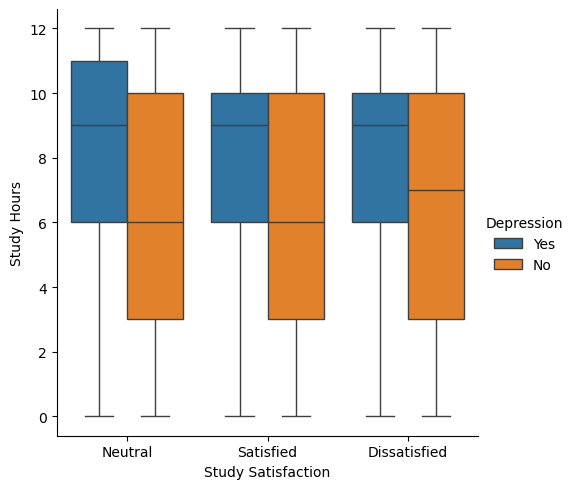

In [372]:
sns.catplot(x="Study Satisfaction",y="Study Hours",hue="Depression",data=df,kind="box")

Students who reported depression have the average study hours high compared to no depression students.

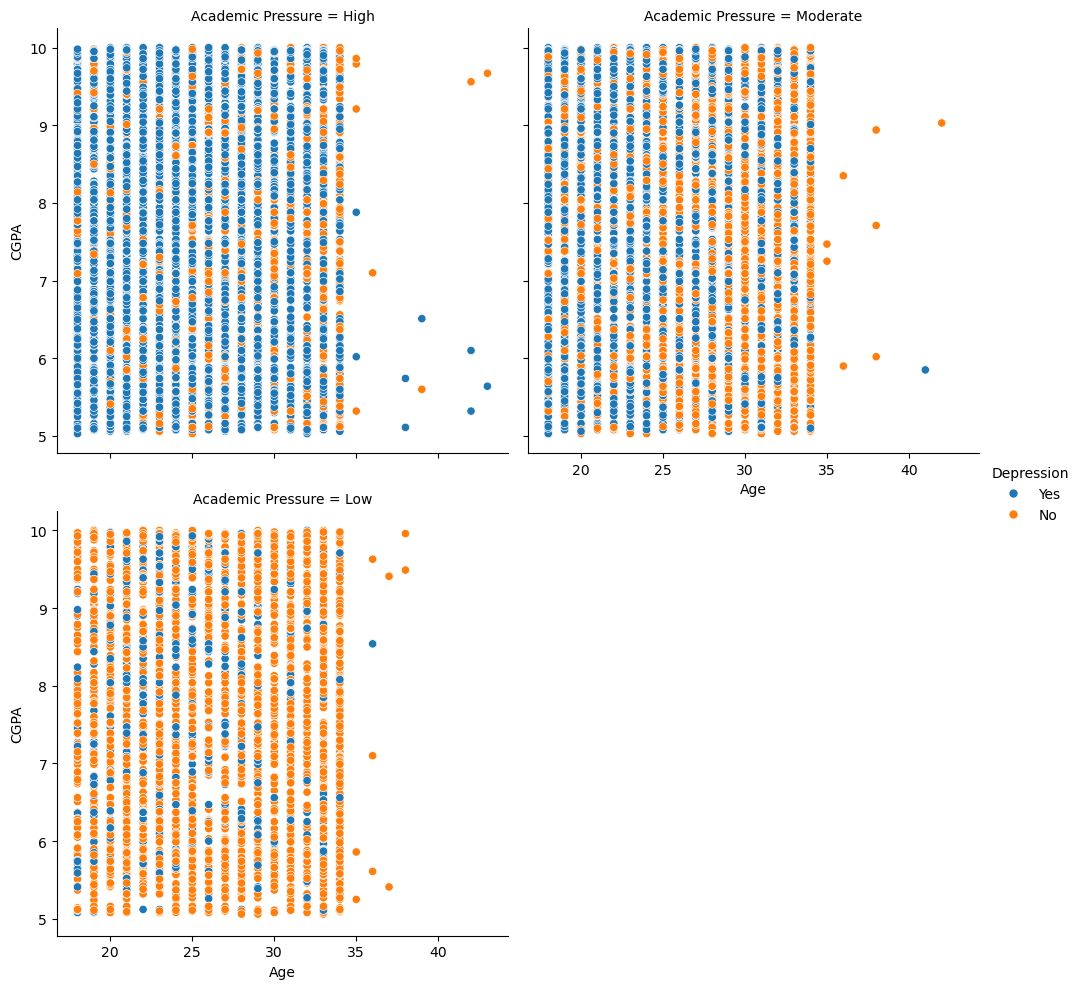

In [375]:
sns.relplot(x="Age",y="CGPA",data=df,hue="Depression",col="Academic Pressure",col_wrap=2)
plt.show()

Students who reported depression are mostly below 25 years of Age.

Academic Pressure is correlated with depression . Students with high academic pressure have high records as depressed and Students with low academic pressure have high records as not depressed.


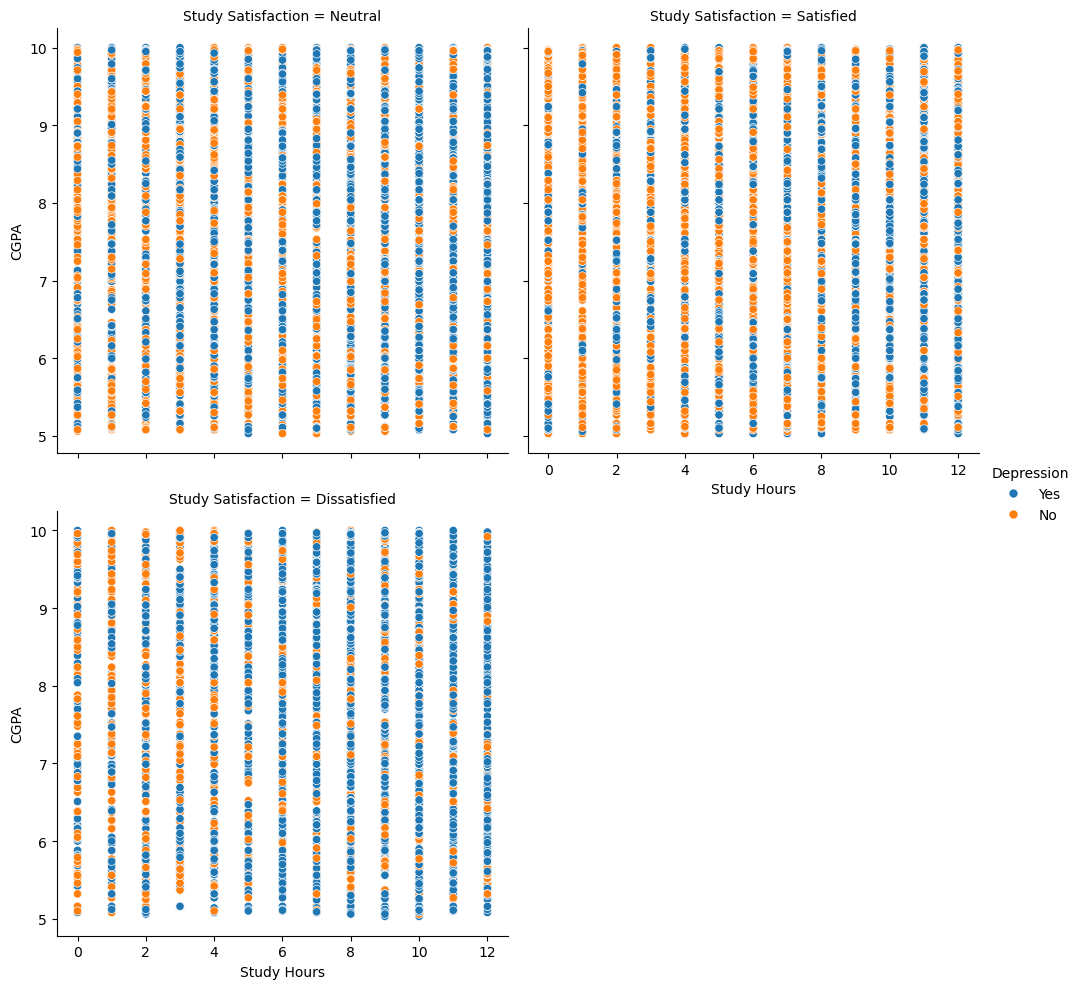

In [377]:
sns.relplot(x="Study Hours",y="CGPA",data=df,hue="Depression",col="Study Satisfaction",col_wrap=2)
plt.show()

students who are dissatisfied in Studies and have high study hours have reported more number of depressed cases

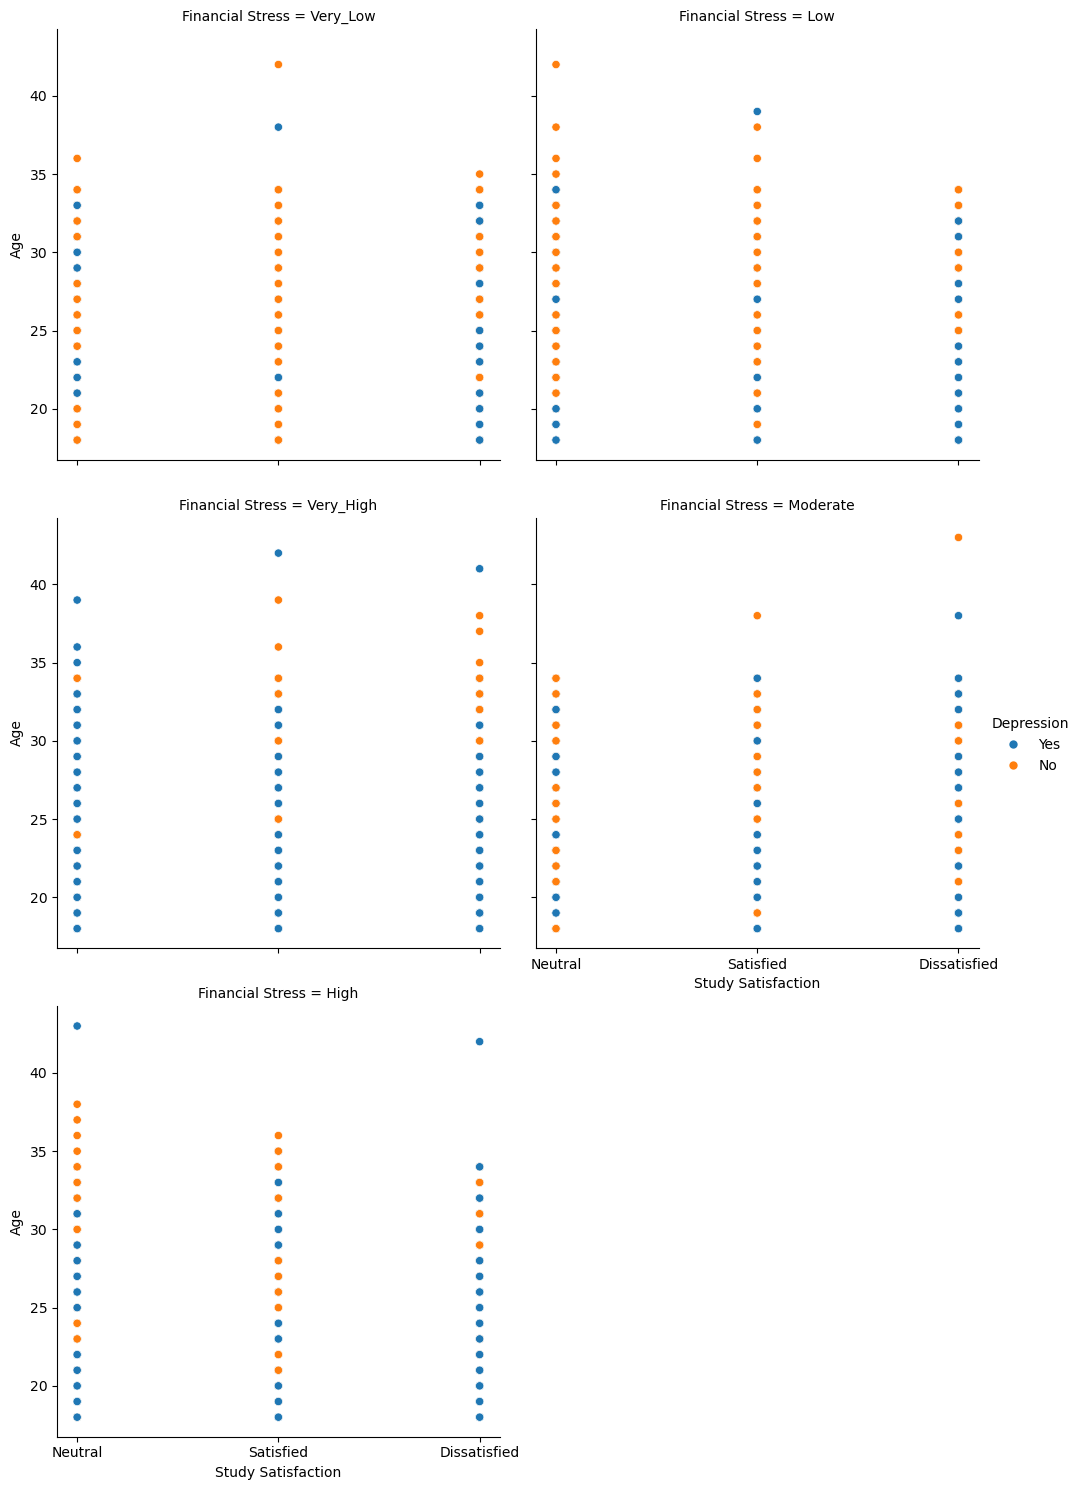

In [379]:
sns.relplot(y="Age",x="Study Satisfaction",data=df,hue="Depression",col="Financial Stress",col_wrap=2)
plt.show()

Financial Stress is correlated with depression

students who reported depression are almost have very_high and high financial stress with age below 30years and have dissatisfaction in studies.

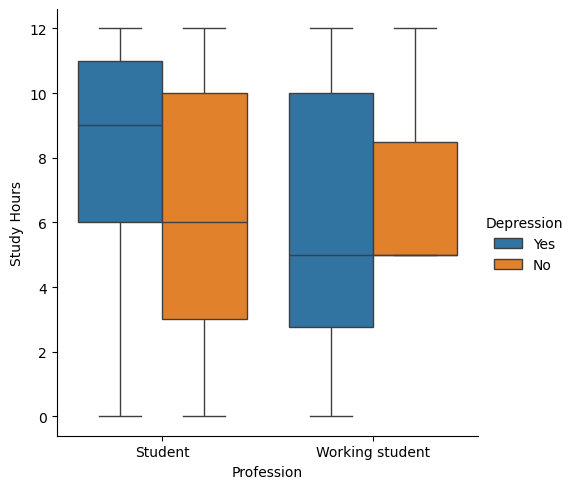

In [384]:
sns.catplot(x="Profession",y="Study Hours",data=df,hue="Depression",kind="box")

**List of Important Observations**

* Academic Pressure is correlated with Depression
* Students who are working are almost all are Depressed irrespective of Sleep Duration and Dietary Habits
* Male students reports slightly high number of Depressed cases than Female students
* Dietary habits is also a factor for Depression . Students who had healthy dietary habits reports less number of Depression cases
* Financial Stress correlates with Depression
* There is significant relation between Suicidal Thoughts and Depression
* Family History of Mental Illness plays major role in Student Depression.Students who had Family History of Mental Illness reports high number of
  Depression cases
* Sleep Duration has impact on Student Mental Health.Students who has Sleep Duration less than 5 hours reported mostly as Depressed
* Students who reported depression are mostly below 25 years of Age.
* Students who are dissatisfied in Studies are recorded as Depressed
* Students who are depressed have high study hours
* Most of the Depressed students are from Class 12

Personalized support plans (e.g., peer mentoring, academic support, lifestyle interventions) can be matched to specific student profiles, improving engagement and effectiveness

Increased promotion of counseling services

Academic adjustments during peak stress times